# Lecture 17 Classification Part I

## 17.0 Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     linear_model,
                     naive_bayes,
                     neighbors)

In [3]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## 17.1 What is Classification?

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

 - For example, spam detection in email service providers can be identified as a classification problem. This is s binary classification since there are only 2 classes as spam and not spam. A classifier utilizes some training data to understand how given input variables relate to the class. In this case, known spam and non-spam emails have to be used as the training data. When the classifier is trained accurately, it can be used to detect an unknown email.
 
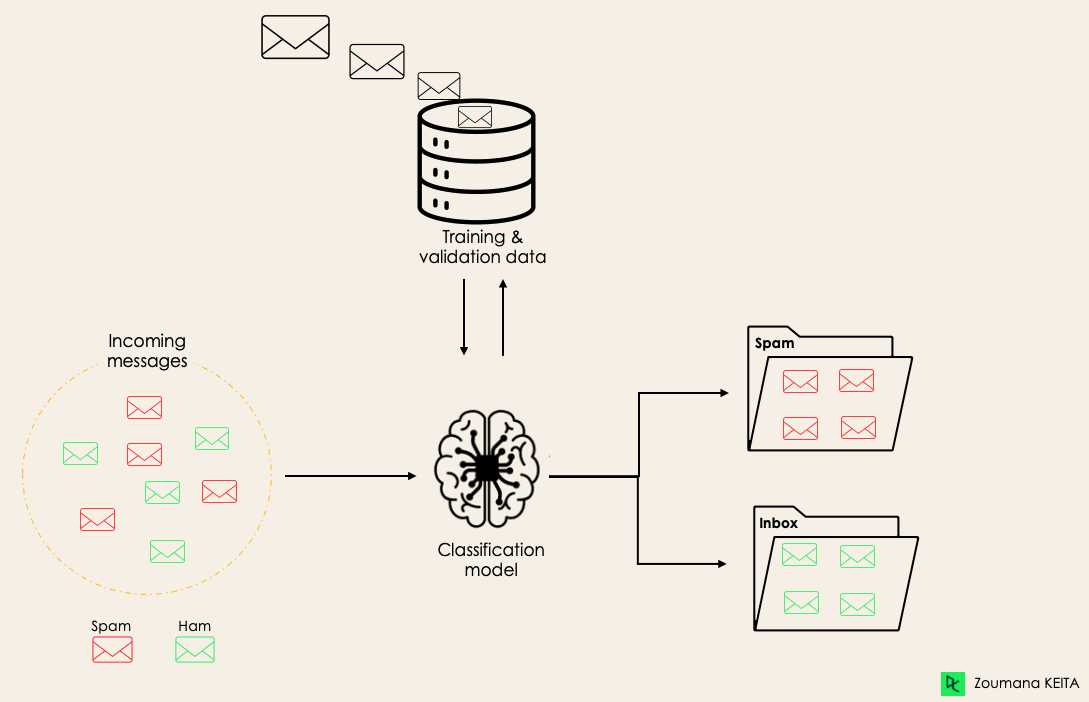



Classification belongs to the category of supervised learning where the targets also provided with the input data. There are many applications in classification in many domains such as in credit approval, medical diagnosis, target marketing etc.

There are two types of learners in classification as lazy learners and eager learners.

### 17.11 Eager learners

Eager learners are machine learning algorithms that first build a model from the training dataset before making any prediction on future datasets. They spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights, but they require less time to make predictions. 

Most machine learning algorithms are eager learners, and below are some examples: 

    Logistic Regression.
    Support Vector Machine. 
    Decision Trees. 
    Artificial Neural Networks. 

### 17.12 Lazy learners

Lazy learners or instance-based learners, on the other hand, do not create any model immediately from the training data, and this is where the lazy aspect comes from. They just memorize the training data, and each time there is a need to make a prediction, they search for the nearest neighbor from the whole training data, which makes them very slow during prediction. Some examples of this kind are: 

    K-Nearest Neighbor. 
    Case-based reasoning. 

## 17.2 Machine Learning Classification Vs. Regression

There are four main categories of Machine Learning algorithms: supervised, unsupervised, semi-supervised, and reinforcement learning. 

Even though classification and regression are both from the category of supervised learning, they are not the same. 


>The prediction task is a classification when the target variable is discrete. An application is the identification of the underlying sentiment of a piece of text. 

>The prediction task is a regression when the target variable is continuous. An example can be the prediction of the salary of a person given their education degree, previous work experience, geographical location, and level of seniority.


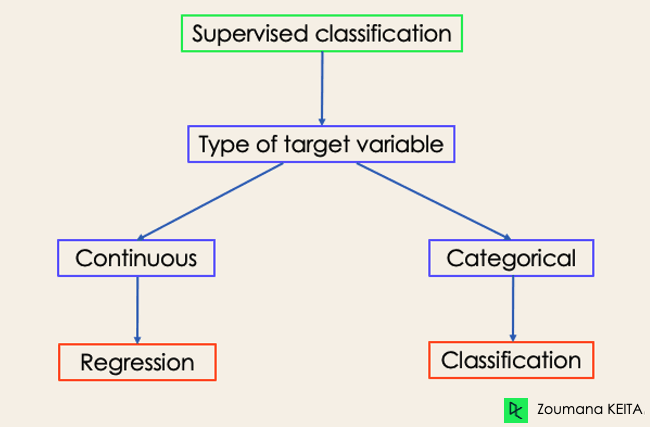

## 17.3 Classification Algorithms


In machine learning and statistics, classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation. This data set may simply be bi-class (like identifying whether the person is male or female or that the mail is spam or non-spam) or it may be multi-class too. Some examples of classification problems are: speech recognition, handwriting recognition, bio metric identification, document classification etc.

Here we have the types of classification algorithms in Machine Learning:

1. **Linear Classifiers: Logistic Regression, Naive Bayes Classifier**
2. **Nearest Neighbor**
3. Support Vector Machines
4. Decision Trees
5. Boosted Trees
6. Random Forest
7. Neural Networks

## 17.4 Different Types of Classification Tasks in Machine Learning 

There are four main classification tasks in Machine learning: binary, multi-class, multi-label, and imbalanced classifications. 

### 17.41 Binary Classification

In a binary classification task, the goal is to classify the input data into two mutually exclusive categories. The training data in such a situation is labeled in a binary format: true and false; positive and negative; O and 1; spam and not spam, etc. depending on the problem being tackled. 

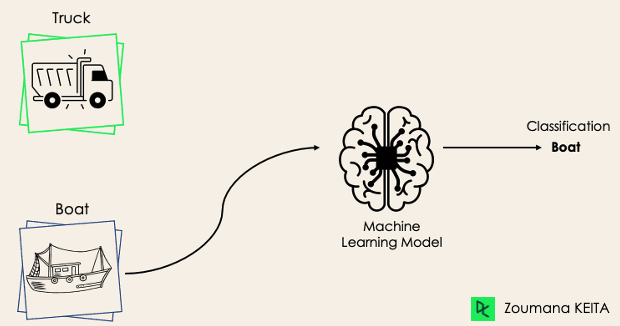

We'll use the "Breast Cancer Wisconsin (Diagnostic)" dataset from the UCI Machine Learning Repository. This dataset is often used for classifying breast cancer tumors as either benign or malignant.

Logistic Regression and Support Vector Machines algorithms are natively designed for binary classifications. However, other algorithms such as K-Nearest Neighbors and Decision Trees can also be used for binary classification. 

In [4]:
# Load the breast cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)

# Create a binary classification model (e.g., Logistic Regression)
model = linear_model.LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.96
Confusion Matrix:
[[40  3]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



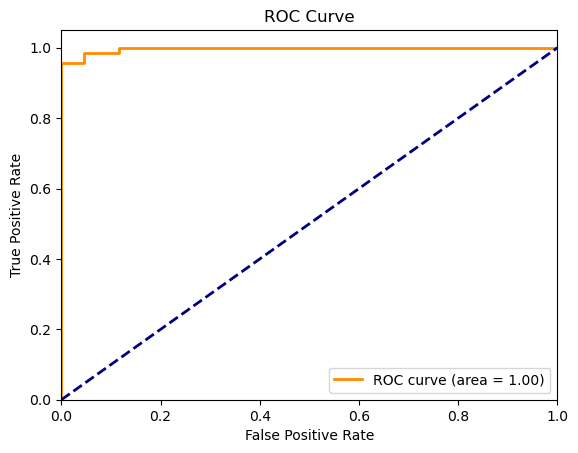

In [5]:
# visualize the results

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


This code will plot the ROC curve, and the area under the ROC curve (AUC) provides a measure of the model's overall performance.import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


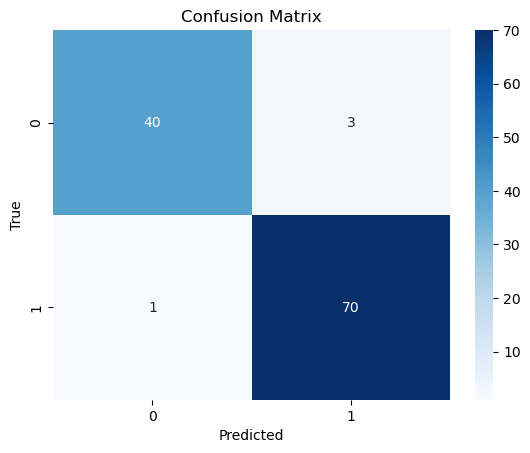

In [6]:
# visualize the confusion matrix to better understand how your model performs 
# in terms of true positives, true negatives, false positives, and false negatives.

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


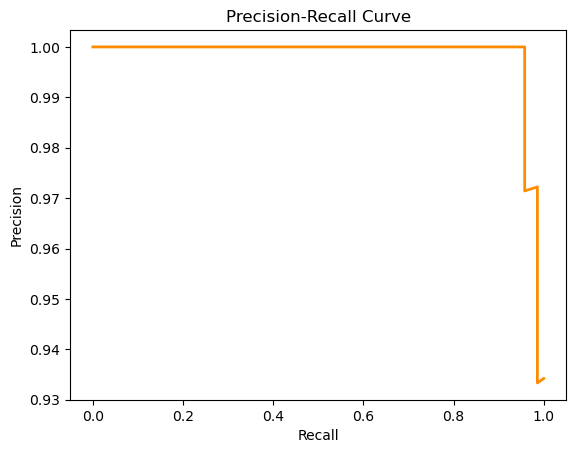

In [7]:
# The precision-recall curve is another way to evaluate the model's performance, 
#especially when dealing with imbalanced datasets. You can use the precision_recall_curve

precision, recall, thresholds = metrics.precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



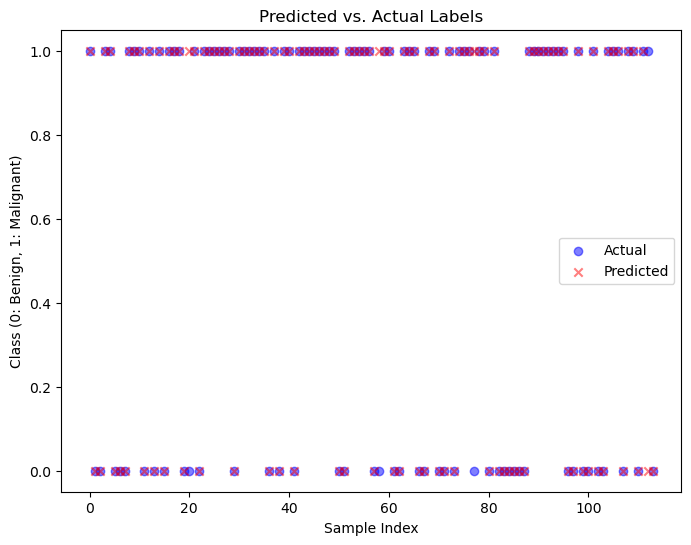

In [8]:

# Plot the predicted vs. actual labels
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', marker='x', color='red', alpha=0.5)

plt.xlabel('Sample Index')
plt.ylabel('Class (0: Benign, 1: Malignant)')
plt.title('Predicted vs. Actual Labels')
plt.legend()
plt.show()


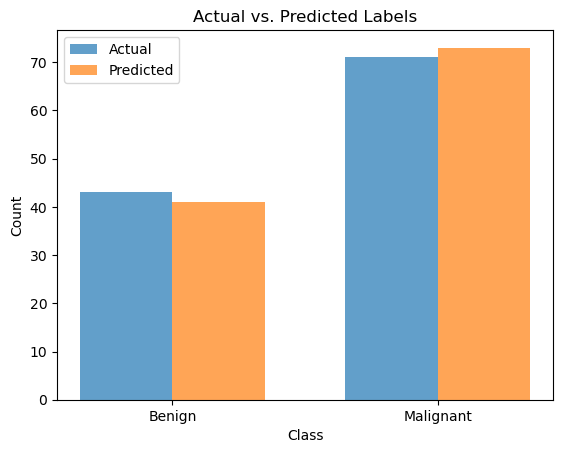

In [9]:


# Count the occurrences of each class in the actual labels
actual_counts = np.bincount(y_test)

# Count the occurrences of each class in the predicted labels
predicted_counts = np.bincount(y_pred)

# Labels for the classes
labels = ['Benign', 'Malignant']

# Create an array with the x-axis positions for the bars
x = np.arange(len(labels))

# Bar width
width = 0.35

# Create the bar chart
plt.bar(x - width/2, actual_counts, width, label='Actual', alpha=0.7)
plt.bar(x + width/2, predicted_counts, width, label='Predicted', alpha=0.7)

# Add labels and a legend
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Labels')
plt.xticks(x, labels)
plt.legend()

plt.show()


### 17.42 Multi-Class Classification

The multi-class classification, on the other hand, has **at least** two mutually exclusive class labels, where the goal is to predict to which class a given input example belongs to. 

Examples include:

- Face classification.
- Plant species classification.
- Optical character recognition.

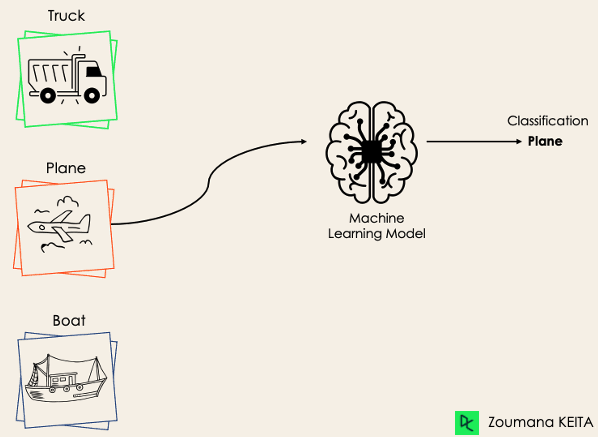

Most of the binary classification algorithms can be also used for multi-class classification. These algorithms include but are not limited to:

- Random Forest
- Naive Bayes 
- K-Nearest Neighbors 
- Gradient Boosting 
- SVM (Support Vector Machine)
- Logistic Regression.

>But wait! Didn’t we say that SVM and Logistic Regression do not support multi-class classification by default? 

→ We can apply binary transformation approaches such as one-versus-one and one-versus-all to adapt native binary classification algorithms for multi-class classification tasks.

 - One-versus-one: this strategy trains as many classifiers as there are pairs of labels. If we have a 3-class classification, we will have three pairs of labels, thus three classifiers, as shown below. 
 
 


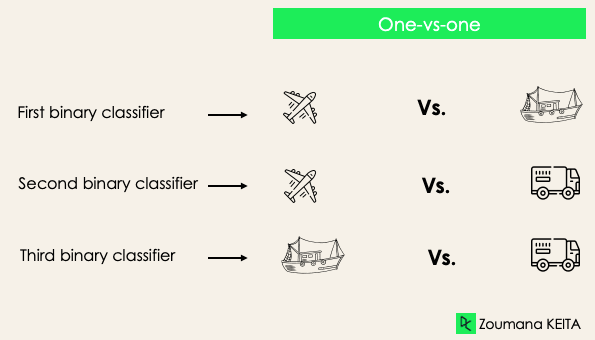

In general, for N labels, we will have Nx(N-1)/2 classifiers. Each classifier is trained on a single binary dataset, and the final class is predicted by a majority vote between all the classifiers. One-vs-one approach works best for SVM and other kernel-based algorithms. 

- One-versus-rest: at this stage, we start by considering each label as an independent label and consider the rest combined as only one label. With 3-classes, we will have three classifiers. 


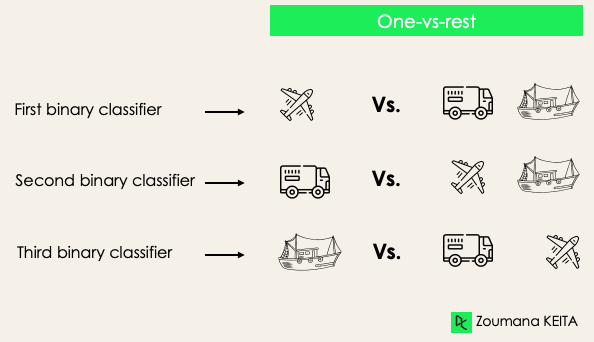

In [10]:
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Classifier with k=3 (you can adjust k as needed)
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.56%


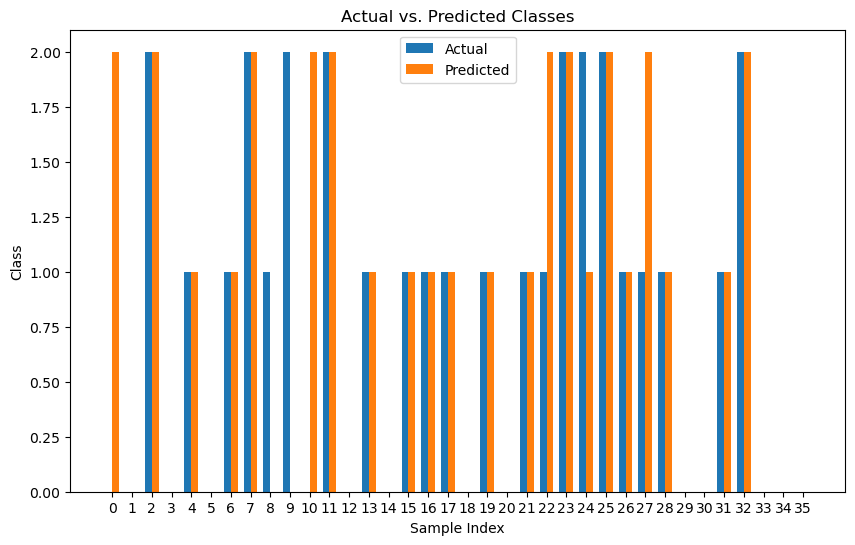

In [11]:
# Create a bar chart to compare predicted vs. actual
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
indices = np.arange(len(y_test))

bar1 = ax.bar(indices - width/2, y_test, width, label='Actual')
bar2 = ax.bar(indices + width/2, y_pred, width, label='Predicted')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Class')
ax.set_title('Actual vs. Predicted Classes')
ax.set_xticks(indices)
ax.legend()

plt.show()

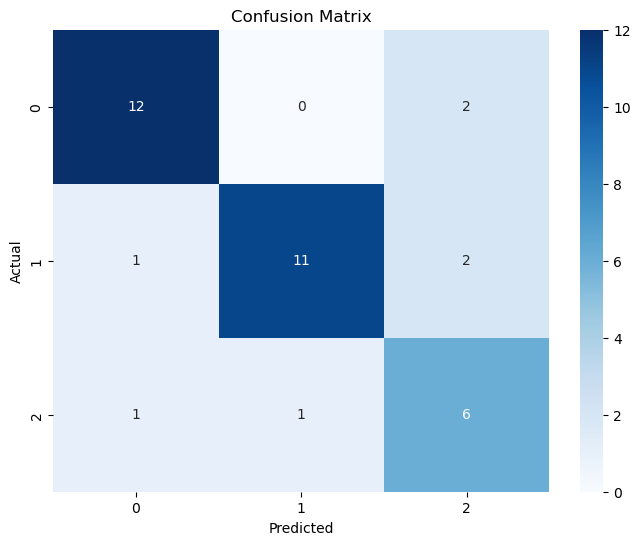

In [12]:
# confusion matrix


cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Classification Report: You can use the classification_report to get a summary of precision, recall, F1-score, 
#and support for each class. 

report = metrics.classification_report(y_test, y_pred, target_names=wine.target_names)
print(report)

              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.92      0.79      0.85        14
     class_2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



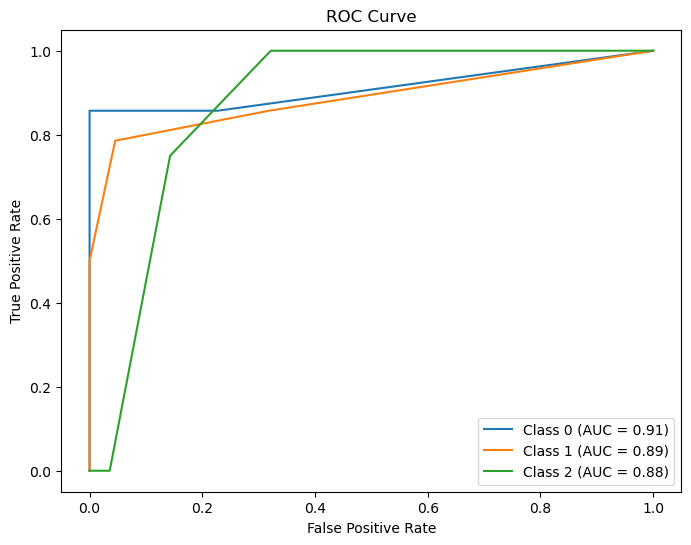

In [14]:
# ROC Curve (Receiver Operating Characteristic):

#from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
metrics.roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], knn_clf.predict_proba(X_test)[:, i])
    metrics.roc_auc[i] = metrics.auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {metrics.roc_auc[i]:.2f})')  # Corrected format string

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### 17.43 Multi-Label Classification

In multi-label classification tasks, we try to predict 0 or more classes for each input example. In this case, there is no mutual exclusion because the input example can have more than one label. 

Such a scenario can be observed in different domains, such as auto-tagging in Natural Language Processing, where a given text can contain multiple topics. Similarly to computer vision, an image can contain multiple objects, as illustrated below: the model predicted that the image contains: a plane, a boat, a truck, and a dog.

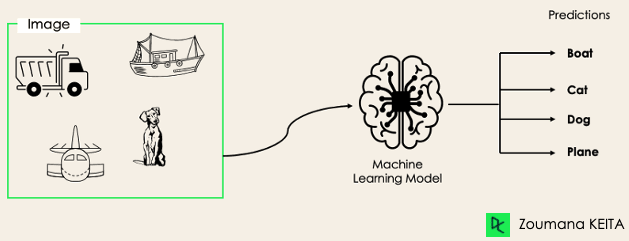

It is not possible to use multi-class or binary classification models to perform multi-label classification. However, most algorithms used for those standard classification tasks have their specialized versions for multi-label classification. We can cite: 

- Multi-label Decision Trees
- Multi-label Gradient Boosting
- Multi-label Random Forests

In [15]:
df = pd.read_csv("../data/dataset-tags.csv")
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [16]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [17]:
df['mysql'] = df['mysql'].astype(float)

In [18]:
#from sklearn.naive_bayes import GaussianNB,MultinomialNB
#from sklearn.metrics import accuracy_score,hamming_loss
#from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
pip install --upgrade pip

In [20]:
!pip install scikit-multilearn

In [21]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [22]:
!pip install neattext

In [23]:
import neattext as nt
import neattext.functions as nfx

In [24]:
# Noise is the unwanted character in our dataset that may affect our model during training.

df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [25]:
#  extract all the stop words available in our title column.

df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [26]:
# remove stop words
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [27]:
# save our clean dataset in a variable

corpus = df['title'].apply(nfx.remove_stopwords)

In [28]:
# transform the words into numeric values based on the frequency of each word 
# that occurs in the entire text.
tfidf = TfidfVectorizer()

In [29]:
# Extracting features

Xfeatures = tfidf.fit_transform(corpus).toarray()

In [30]:
# see the array of features
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# Getting labels
y = df[['mysql', 'python', 'php']]

In [32]:
X_train,X_test,y_train,y_test = skms.train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

We use the train_test_split to split our dataset into two. 70% of the dataset is used as the train set, and 30% as the test set.

>In machine learning, the random_state parameter is often used to control the randomness of certain operations that involve random numbers. Setting random_state to a specific value ensures reproducibility, meaning that if you run the same code with the same random_state value multiple times, you'll get the same results. It's a way to make your machine learning experiments predictable and repeatable.

The choice of the value, like 42, is arbitrary. You can use any integer value you like. The number 42 is commonly used as an example because it has no special significance, but it's easy to remember.

**Binary relevance technique**

This is used to convert our multi-label problem to a multi-class problem. Let’s initialize this technique.

In [33]:
binary_rel_clf = BinaryRelevance(naive_bayes.MultinomialNB())

We also add the MultinomialNB() method. MultinomialNB() is the Naive Bayes algorithm method used for classification.

In [34]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [35]:
br_prediction = binary_rel_clf.predict(X_test)
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [36]:
metrics.accuracy_score(y_test,br_prediction)

0.9090909090909091

### 17.44 Imbalanced Classification

For the imbalanced classification, the number of examples is unevenly distributed in each class, meaning that we can have more of one class than the others in the training data. 

The imbalanced classification problem could occur in the following scenario:

- Fraudulent transaction detections in financial industries
- Rare disease diagnosis 
- Customer churn analysis

Using conventional predictive models such as Decision Trees, Logistic Regression, etc. could not be effective when dealing with an imbalanced dataset, because they might be biased toward predicting the class with the highest number of observations, and considering those with fewer numbers as noise. 

The most commonly used approaches include **sampling techniques** or harnessing the power of **cost-sensitive algorithms**. 

In [37]:
# install the imbalanced-learn library. 
!pip install -U imbalanced-learn


In [38]:
from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (replace with the actual path to your CSV file)
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
# Split the data into features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)


In [ ]:
# Evaluate the classifier
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


In this example, we load the "Credit Card Fraud Detection" dataset, apply Synthetic Minority Over-sampling Technique (SMOTE) to handle the class imbalance, and train a Random Forest classifier for fraud detection. 

## 17.5 Iris Dataset

In [ ]:
iris = datasets.load_iris()
# print(iris.DESCR)

In [ ]:
print(iris.DESCR)

In [ ]:
iris

### 17.31 EDA

In [ ]:
iris_df = pd.DataFrame(iris.data, 
                       columns=iris.feature_names)
iris_df['tgt'] = iris.target
iris_df.head(3)

In [ ]:
iris_df.tail(3)

In [ ]:
iris_df.describe()

In [ ]:
iris_df.tgt.value_counts()

In [ ]:
iris.target_names

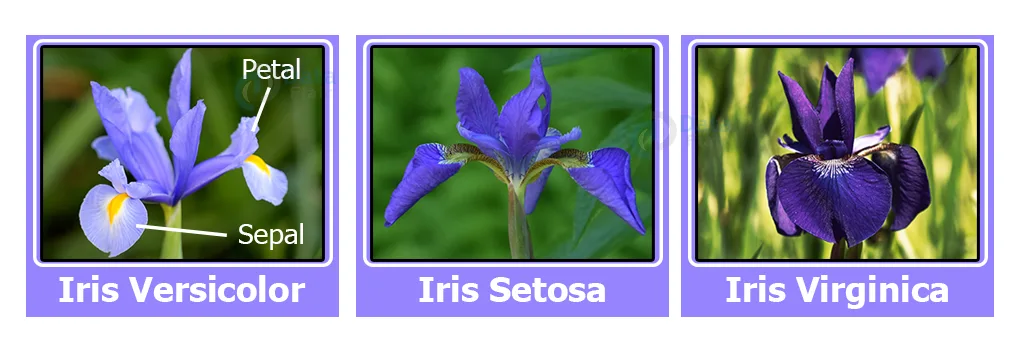

In [ ]:
sns.pairplot(iris_df, hue='tgt', height=1.5);

 - From this visualization, we can tell that iris-setosa is well separated from the other two flowers.

 - And iris virginica is the longest flower and iris setosa is the shortest.

### 17.32 k-Nearest Neighbors

**Train-Test Split**

In [ ]:
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt,  iris_test_tgt) = skms.train_test_split(iris.data,
                                                         iris.target,
                                                         test_size=.95)
len(iris_train_ftrs), len(iris_test_ftrs)

**kNN Fitting**

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

actuals = iris_test_tgt
metrics.accuracy_score(actuals, preds)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(actuals, preds)
confusion = confusion_matrix(actuals, preds)
classification_rep = classification_report(actuals, preds, target_names=iris.target_names)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

actuals = iris_test_tgt
metrics.accuracy_score(actuals, preds)

In [ ]:
# 1-NN is purely memorizes the test (the training data)
memorizer = neighbors.KNeighborsClassifier(n_neighbors=1)
memorizer.fit(iris_train_ftrs, iris_train_tgt)
preds = memorizer.predict(iris_train_ftrs)
metrics.accuracy_score(iris_train_tgt, preds)

In [ ]:
preds = memorizer.predict(iris_test_ftrs)
metrics.accuracy_score(iris_test_tgt, preds)

### 17.33 Logistic Regression

In [ ]:
# Initialize the logistic regression model
logr = LogisticRegression(max_iter=1000)

# Fit the model on the training data
fit = logr.fit(iris_train_ftrs, iris_train_tgt)

# Predict the class labels for the test set
preds = fit.predict(iris_test_ftrs)

actuals = iris_test_tgt



In [ ]:
# Evaluate the model
accuracy = accuracy_score(actuals, preds)
confusion = confusion_matrix(actuals, preds)
classification_rep = classification_report(actuals, preds, target_names=iris.target_names)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)